In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv('revenue_prediction (3).csv')
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [43]:
top_res=df.sort_values(by='Revenue',ascending=False).head(10)

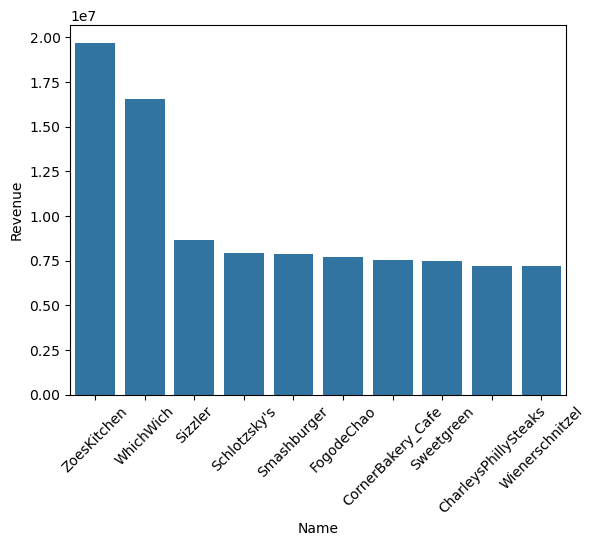

In [51]:
sns.barplot(x=top_res['Name'],y=top_res['Revenue'])
plt.xticks(rotation=45)
plt.show()

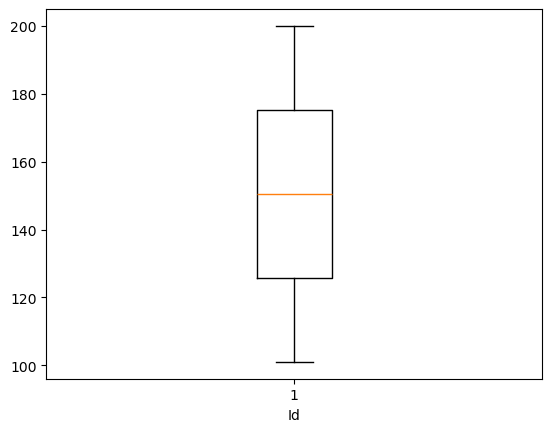

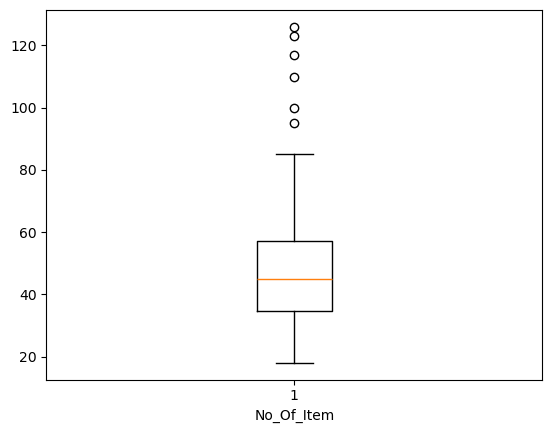

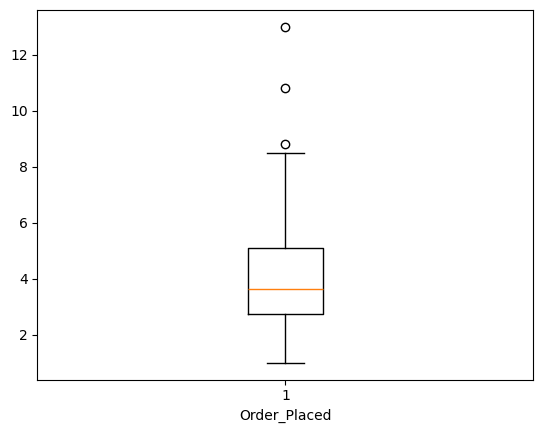

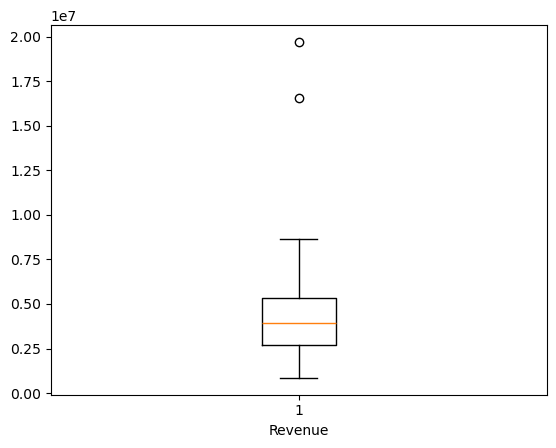

In [6]:
for i in df.columns:
    if df[i].dtype!='object':
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [8]:
new_df=df.drop(['Id','Name'],axis=1)

In [10]:
new_df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...
95,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,Yes,Sports Bar,Pune,25,2.1,2344689


In [18]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [20]:
for i in new_df.columns:
    if new_df[i].dtype=='object':
        new_df[i]=Le.fit_transform(new_df[i])

In [21]:
new_df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,12,0,55,5.5,5953753
1,0,19,1,72,6.8,7223131
2,1,5,4,25,1.9,2555379
3,1,11,2,18,2.5,2175511
4,1,13,3,48,4.2,4816715
...,...,...,...,...,...,...
95,0,11,0,19,1.1,1270499
96,1,19,0,75,6.3,6412623
97,1,19,1,77,6.2,6694797
98,1,17,4,25,2.1,2344689


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=new_df.drop('Revenue', axis=1)
y=df['Revenue']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=32)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import *

In [58]:
print("r2 score is: ",end="")
print(r2_score(y_test,y_pred)*100)

r2 score is: 93.5578292824395


In [38]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(471635.70710771653)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Names']=new_df.columns
vif_data['vif_score']=[variance_inflation_factor(new_df.values,i) for i in range(len(new_df.columns))]
vif_data

,Names,vif_score
0,Franchise,2.040616
1,Category,3.996429
2,City,1.990405
3,No_Of_Item,111.088124
4,Order_Placed,145.184195
5,Revenue,29.562698


In [72]:
per_df=new_df.drop('Order_Placed',axis=1)

In [73]:
vif_data=pd.DataFrame()
vif_data['Names']=per_df.columns
vif_data['vif_score']=[variance_inflation_factor(per_df.values,i) for i in range(len(per_df.columns))]
vif_data

,Names,vif_score
0,Franchise,2.032338
1,Category,3.974811
2,City,1.989715
3,No_Of_Item,27.347595
4,Revenue,19.811305


In [74]:
per_df=per_df.drop('No_Of_Item',axis=1)

In [75]:
vif_data=pd.DataFrame()
vif_data['Names']=per_df.columns
vif_data['vif_score']=[variance_inflation_factor(per_df.values,i) for i in range(len(per_df.columns))]
vif_data

,Names,vif_score
0,Franchise,2.025225
1,Category,3.007550
2,City,1.930067
3,Revenue,2.693880


In [77]:
xv=per_df.drop('Revenue',axis=1)
yv=per_df['Revenue']

In [78]:
xv_train,xv_test,yv_train,yv_test=train_test_split(xv,yv,test_size=0.20,random_state=32)

In [79]:
modelv=LinearRegression()
modelv.fit(xv_train,yv_train)

LinearRegression()

In [80]:
yv_pred=modelv.predict(xv_test)

In [82]:
r2_score(yv_test,yv_pred)*100

-15.879118044639217